## A brief dive into attrition data: What Makes Workers Happy?

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
attrition= pd.read_csv('Employee_Attrition.csv')
attrition.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [8]:
list(attrition.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
attrition[['JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'JobLevel']].describe()

,JobSatisfaction,MonthlyIncome,WorkLifeBalance,JobLevel
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.728571,6502.931293,2.761224,2.063946
std,1.102846,4707.956783,0.706476,1.106940
min,1.000000,1009.000000,1.000000,1.000000
25%,2.000000,2911.000000,2.000000,1.000000
50%,3.000000,4919.000000,3.000000,2.000000
75%,4.000000,8379.000000,3.000000,3.000000
max,4.000000,19999.000000,4.000000,5.000000


The three questions we are looking to answer are:
1. Do people that travel more often report lower job satisfaction? If so, are those people more likely to leave?  
2. Are high earners more satisfied with their jobs?  
3. Do experts get better work life balance?

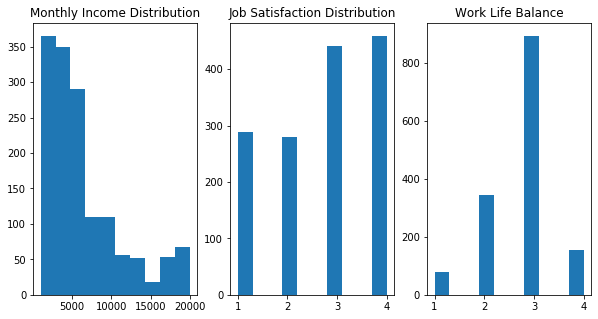

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Monthly Income Distribution')
plt.hist(attrition['MonthlyIncome'])
plt.subplot(1, 3, 2)
plt.hist(attrition['JobSatisfaction'])
plt.title('Job Satisfaction Distribution')
plt.subplot(1, 3, 3)
plt.hist(attrition['WorkLifeBalance'])
plt.title('Work Life Balance')
plt.show()

Note that the 'Job Satisfaction' and 'Work Life Balance' categories are rated 'Low, Medium, High, Very High' and 'Bad, Good, Better, Best' respectively, which may skew survey answers toward more positive results since most of the answers provided describe some level of satisfaction. 

# 1. __Do more frequent travelers report lower job satisfaction__?

In [11]:
attrition['JobSatisfaction'].groupby(attrition['BusinessTravel']).describe()

,count,mean,std,min,25%,50%,75%,max
BusinessTravel,,,,,,,,
Non-Travel,150.0,2.793333,1.031690,1.0,2.0,3.0,4.0,4.0
Travel_Frequently,277.0,2.790614,1.099828,1.0,2.0,3.0,4.0,4.0
Travel_Rarely,1043.0,2.702780,1.113459,1.0,2.0,3.0,4.0,4.0


In [12]:
#Define groups
non_travelers_satisfaction= attrition[attrition['BusinessTravel'] == 'Non-Travel']['JobSatisfaction']
rare_travelers_satisfaction= attrition[attrition['BusinessTravel'] == 'Travel_Rarely']['JobSatisfaction']
frequent_travelers_satisfaction= attrition[attrition['BusinessTravel'] == 'Travel_Frequently']['JobSatisfaction']

In [14]:
#Separate groups into active and inactive employees
already_left= attrition[attrition['Attrition'] == 'Yes']
employees= attrition[attrition['Attrition'] == 'No']

In [15]:
travel_counts= employees['BusinessTravel'].value_counts()
travel_counts_quitters= already_left['BusinessTravel'].value_counts()

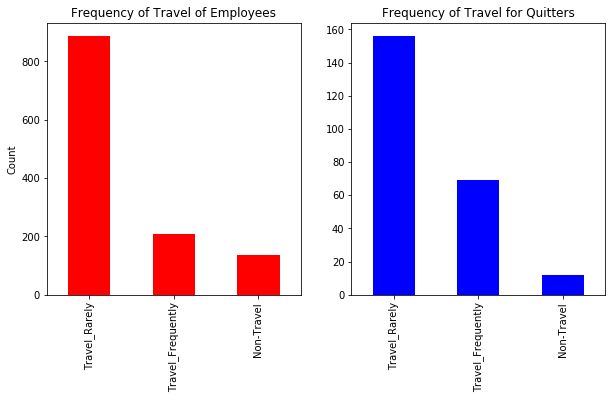

In [17]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
plt.ylabel('Count')
plt.title('Frequency of Travel of Employees')
travel_counts.plot(kind='bar', color= 'red')

plt.subplot(1, 2, 2)
plt.title('Frequency of Travel for Quitters')
travel_counts_quitters.plot(kind='bar', color= 'blue')
plt.show()

Here it is evident that among the group that has quit, a much higher percentage of employees had to travel frequently or rarely, while very few had non-traveling jobs. While the difference is visually striking, no significant difference was found in the T-test above.   

In [24]:
print(ttest_ind(non_travelers_satisfaction, rare_travelers_satisfaction, equal_var=False))

Ttest_indResult(statistic=0.9948719326226181, pvalue=0.32098710071005104)


By running a T-test on the two traveling groups with the largest difference in average job satisfaction, we conclude that traveling frequency has no significant effect on job satifaction in this company. In fact, those who travel frequently reported nearly the same job satisfaction as non-travelers. 

# 2. __Are high earners more satisfied with their job__?

In [ ]:
#Sort index by Income
attrition= attrition.sort_values(by=['MonthlyIncome'])
attrition.reset_index()

In [19]:
#Divide into earning groups by level, find mean JobSat, mean Age at each one.
attrition['groups'] = (attrition['MonthlyIncome'] / (attrition.shape[0]/1.)).astype(int)
sat_by_income_level= attrition.groupby('groups').agg({'MonthlyIncome':'mean','JobSatisfaction':'mean', 'Age': 'mean'})
sat_by_income_level

,MonthlyIncome,JobSatisfaction,Age
groups,,,
0,1205.111111,2.944444,25.555556
1,2423.212291,2.754190,32.553073
2,3707.239216,2.615686,34.098039
3,5096.312268,2.784387,37.115242
4,6501.175676,2.804054,36.743243
5,8023.298701,2.662338,37.584416
6,9617.692308,2.756410,37.884615
7,10767.746032,2.698413,43.285714
8,12502.296296,2.592593,42.888889


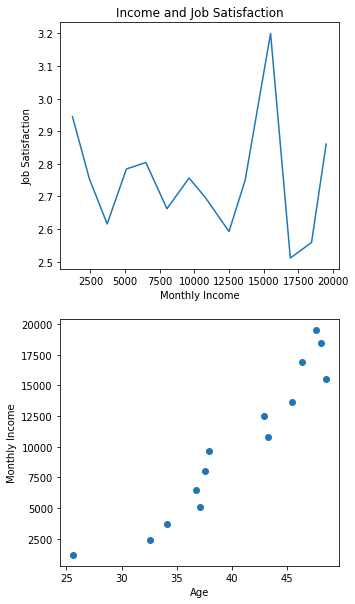

In [20]:
plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.plot(sat_by_income_level['MonthlyIncome'],
         sat_by_income_level['JobSatisfaction'])
plt.ylabel('Job Satisfaction')
plt.xlabel('Monthly Income')
plt.title('Income and Job Satisfaction')

plt.subplot(2, 1, 2)
plt.scatter(x=sat_by_income_level['Age'],
         y=sat_by_income_level['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

The graphs above paint an interesting picture: Age shows a strong correlation with monthly income, as older employees tend to get paid better. However, these older, more wealthy employees do not report being more satisfied with their jobs than their more modestly living colleagues. More specifically, there is a spike of satisfaction at the 15,000 per month group- could this mean there is a "goldilocks" zone of higher pay before increasing job responsibilities and stress make the extra pay less worthwhile?

# 3. __Do experts get better work life balance__?

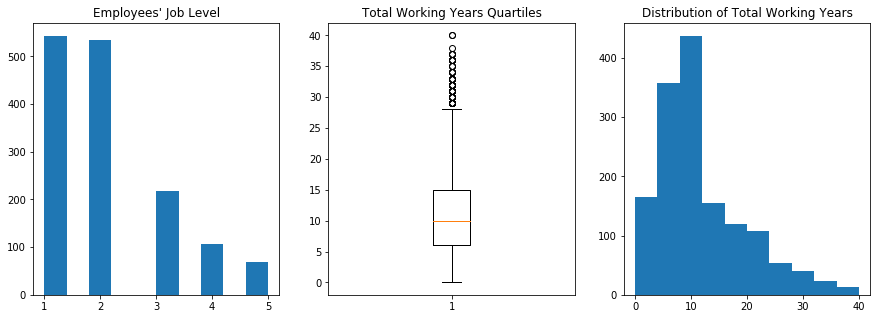

In [21]:
#What is an expert?
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(attrition['JobLevel'])
plt.title("Employees' Job Level")
plt.subplot(1, 3, 2)
plt.boxplot(attrition['TotalWorkingYears'])
plt.title('Total Working Years Quartiles')
plt.subplot(1, 3, 3)
plt.hist(attrition['TotalWorkingYears'])
plt.title('Distribution of Total Working Years')
plt.show()

For our purposes, an "expert" is an employee with a job level of 4 or greater, 5 years at the company, and 15 years experience. 

In [22]:
#Divide subgroups
experts= pd.DataFrame(attrition[(attrition['TotalWorkingYears'] >= 15) & (attrition['JobLevel'] >= 4) & (attrition['YearsAtCompany'] >= 5)])
nonexperts= pd.DataFrame(attrition[(attrition['TotalWorkingYears'] < 15) & (attrition['JobLevel'] < 4) & (attrition['YearsAtCompany'] < 5)])

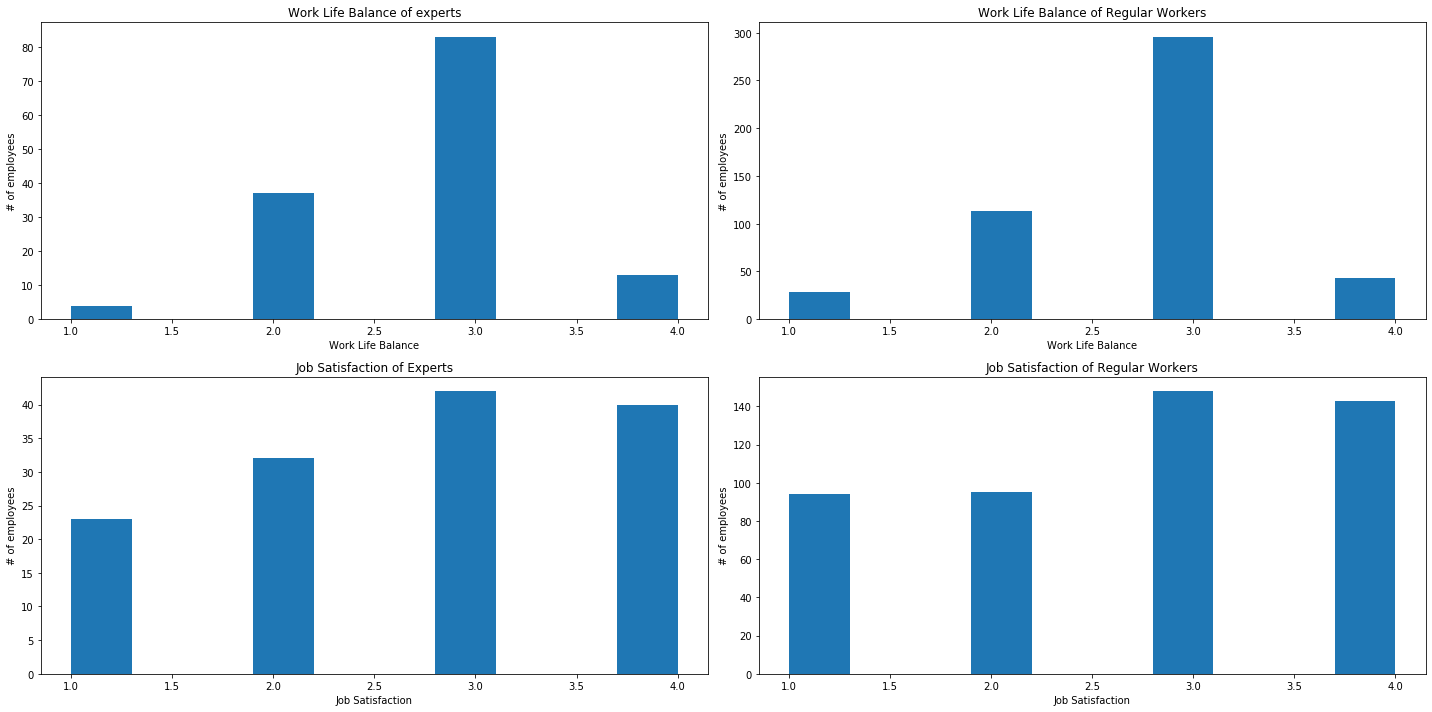

In [23]:
#expert work/life balance vs. non expert work/life balance
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.hist(experts['WorkLifeBalance'])
plt.title("Work Life Balance of experts")
plt.xlabel('Work Life Balance')
plt.ylabel('# of employees')

plt.subplot(2, 2, 2)
plt.hist(nonexperts['WorkLifeBalance'])
plt.title('Work Life Balance of Regular Workers')
plt.xlabel('Work Life Balance')
plt.ylabel('# of employees')

plt.subplot(2, 2, 3)
plt.hist(experts['JobSatisfaction'])
plt.title('Job Satisfaction of Experts')
plt.xlabel('Job Satisfaction')
plt.ylabel('# of employees')

plt.subplot(2, 2, 4)
plt.hist(nonexperts['JobSatisfaction'])
plt.title('Job Satisfaction of Regular Workers')
plt.xlabel('Job Satisfaction')
plt.ylabel('# of employees')
plt.tight_layout()
plt.show()

The work life balance and job satisfaction does not change significantly among experts versus non-experts, indicating that staying with the company longer, having more experience in your career, or having a more essential role within the company do not significantly improve or worsen the experience. They may be paid more than their colleagues, but their self-reported satisfaction and work life balances do not impact how they view these facets of their lives. 